In [78]:
import pandas as pd
import networkx as nx
import numpy as np

In [79]:
commits = pd.read_feather('../data/commits.feather')
commits.head()

,commit_id,project_id,project_name,parent_id
0,321132855,26730207,meta-ivi,321132856.0
1,333294039,27617768,ExcelLaunchPad,333294036.0
2,302312189,24513310,yii2-webception,302312191.0
3,124854783,3452681,mammoth.js,124843456.0
4,423307958,32130467,phase-0,423307476.0


In [80]:
project_names_sample = commits[['project_name']].sample(500, random_state = 2019)
commits_sample = commits.loc[commits['project_name'].isin(project_names_sample.project_name.values)]
commits_sample.head()

,commit_id,project_id,project_name,parent_id
5,216345610,15364771,ProjectEuler,216345505.0
10,378012761,31249832,test,378012249.0
20,143485967,1176626,android_platform_sdk,143485973.0
21,143483221,1176626,android_platform_sdk,143483220.0
36,328689640,24929739,gambuzzi.github.io,309390790.0


In [81]:
class GraphExtracter():
    def __init__(self, graph):
        self.graph = graph
        
    def get_nodes(self):
        self.num_nodes = self.graph.number_of_nodes()
        return self.num_nodes
    
    def get_edges(self):
        self.num_edges = self.graph.number_of_edges()
        return self.num_edges
    
    def get_density(self):
        self.density = nx.density(self.graph)
        return self.density
    
    def get_avg_clustering(self):
        self.avg_clustering = nx.algorithms.cluster.average_clustering(self.graph)
        return self.avg_clustering
    
    def get_transitivity(self):
        self.transitivity = nx.algorithms.cluster.transitivity(self.graph)
        return self.transitivity
    
    def get_weakly_connected(self):
        self.weakly_connected = nx.algorithms.components.is_weakly_connected(self.graph)
        return self.weakly_connected
    
    def get_num_weakly_connected(self):
        self.num_weakly_connected = nx.algorithms.components.number_weakly_connected_components(self.graph)
        return self.num_weakly_connected
    
    def get_num_attrac_components(self):
        self.num_attrac_components = nx.algorithms.components.number_attracting_components(self.graph)
        return self.num_attrac_components
    
    def get_avg_degree(self):
        degree = nx.degree(self.graph)
        degree = list(degree)
        degree = [entry[1] for entry in degree]
        self.avg_degree = np.mean(degree)
        return self.avg_degree
    
    def get_avg_degree_centrality(self):
        self.avg_degree_centrality = np.mean(list(nx.algorithms.centrality.degree_centrality(self.graph).values()))
        return self.avg_degree_centrality
    
    def get_avg_in_degree(self):
        in_ = self.graph.in_degree
        in_ = list(in_)
        in_ = [entry[1] for entry in in_]
        self.avg_in_degree = np.mean(in_)
        return self.avg_in_degree
    
    def get_avg_in_degree_centrality(self):
        self.avg_in_degree_centrality = np.mean(list(nx.algorithms.centrality.in_degree_centrality(self.graph).values()))
        return self.avg_in_degree_centrality
    
    def get_avg_out_degree(self):
        out = self.graph.out_degree
        out = list(out)
        out = [entry[1] for entry in out]
        self.avg_out_degree = np.mean(out)
        return self.avg_out_degree
    
    def get_avg_out_degree_centrality(self):
        self.avg_out_degree_centrality = np.mean(list(nx.algorithms.centrality.out_degree_centrality(self.graph).values()))
        return self.avg_out_degree_centrality
    
    def get_eigen_centrality(self):
        self.eigen_centrality = np.mean(list(nx.algorithms.centrality.eigenvector_centrality(self.graph, max_iter=int(1e6)).values()))
        return self.eigen_centrality
    
    def get_katz_centrality(self):
        self.katz_centrality = np.mean(list(nx.algorithms.centrality.katz_centrality(self.graph, max_iter=int(1e6)).values()))
        return self.katz_centrality
    
    def get_num_triangles(self):
        self.num_triangles = np.mean(list(nx.algorithms.cluster.clustering(self.graph).values()))
        return self.num_triangles
    
    def set_all_features(self):
        self.get_nodes()
        self.get_edges()
        self.get_density()
        self.get_avg_clustering()
        self.get_transitivity()
        self.get_weakly_connected()
        self.get_num_weakly_connected()
        self.get_num_attrac_components()
        self.get_avg_degree()
        self.get_avg_degree_centrality()
        self.get_avg_in_degree()
        self.get_avg_in_degree_centrality()
        self.get_avg_out_degree()
        self.get_avg_out_degree_centrality()
        self.get_eigen_centrality()
        self.get_katz_centrality()
        self.get_num_triangles()
        return None

    def get_all_features(self):
        return {
            'num_nodes': self.num_nodes,
            'num_edges': self.num_edges,
            'density': self.density,
            'avg_clustering': self.avg_clustering,
            'transitivity': self.transitivity,
            'weakly_connected': self.weakly_connected,
            'num_weakly_connected': self.num_weakly_connected,
            'num_attrac_components': self.num_attrac_components,
            'avg_degree': self.avg_degree,
            'avg_degree_centrality': self.avg_degree_centrality,
            'avg_in_degree': self.avg_in_degree,
            'avg_in_degree_centrality': self.avg_in_degree_centrality,
            'avg_out_degree': self.avg_out_degree,
            'avg_out_degree_centrality': self.avg_out_degree_centrality,
            'eigen_centrality': self.eigen_centrality,
            'katz_centrality': self.katz_centrality,
            'num_triangles': self.num_triangles}

In [85]:
graphs = {}

for idx, project in enumerate(project_names_sample.project_name.values):
    if idx%10 == 0:
        print(f'Percentage Completed: {idx/500}%')
    graph_df = commits_sample.loc[commits_sample['project_name'] == project]
    graph_df = graph_df[['commit_id', 'parent_id']]
    graph_df.columns = pd.Index(['target', 'source'])
    
    if graph_df.shape[0] > 2500:
        continue
        
    graph = nx.from_pandas_edgelist(graph_df, create_using=nx.DiGraph)
    graph.name = project
    graph_extracter = GraphExtracter(graph)
    graph_extracter.set_all_features()
    graphs[project] = graph_extracter.get_all_features()

Percentage Completed: 0.0%
Percentage Completed: 0.02%
Percentage Completed: 0.04%
Percentage Completed: 0.06%
Percentage Completed: 0.08%
Percentage Completed: 0.1%
Percentage Completed: 0.12%
Percentage Completed: 0.14%
Percentage Completed: 0.16%
Percentage Completed: 0.18%
Percentage Completed: 0.2%
Percentage Completed: 0.22%
Percentage Completed: 0.24%
Percentage Completed: 0.26%
Percentage Completed: 0.28%
Percentage Completed: 0.3%
Percentage Completed: 0.32%
Percentage Completed: 0.34%
Percentage Completed: 0.36%
Percentage Completed: 0.38%
Percentage Completed: 0.4%
Percentage Completed: 0.42%
Percentage Completed: 0.44%
Percentage Completed: 0.46%
Percentage Completed: 0.48%
Percentage Completed: 0.5%
Percentage Completed: 0.52%
Percentage Completed: 0.54%
Percentage Completed: 0.56%
Percentage Completed: 0.58%
Percentage Completed: 0.6%
Percentage Completed: 0.62%
Percentage Completed: 0.64%
Percentage Completed: 0.66%
Percentage Completed: 0.68%
Percentage Completed: 0.7%


In [103]:
graph_features = pd.DataFrame(graphs).T

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=5).fit_transform(graph_features)

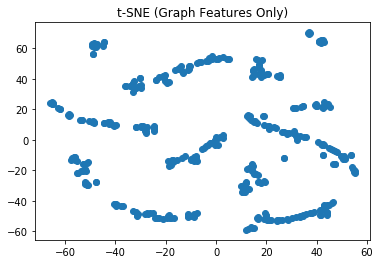

In [106]:
import matplotlib.pyplot as plt

plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title('t-SNE (Graph Features Only)');

### Features

- Number of Nodes
- Number of Edges
- Density
- Average Clustering Coefficient
- Transitivity
- Weakly Connected
- Number of Weakly Connected
- Number attracting components

- Degree Centrality **dict**
- In-Degree Centrality **dict**
- Out-Degree Centrality **dict**
- Eigenvector Centrality **dict**
- Katz Centrality **dict**
- Current-flow Closeness Centrality **dict**
- Betweenness Centrality **dict**
- Clustering **dict**

- Average degree (overall)
- Average in degree
- Average out degree